In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

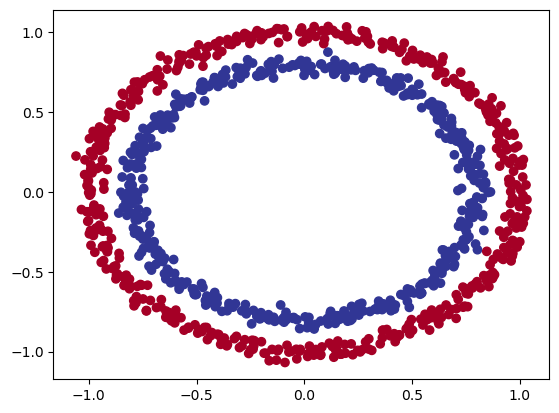

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.4732 - loss: 4.7189
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.4812 - loss: 3.6676
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5215 - loss: 0.7504
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5143 - loss: 0.7035
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.5160 - loss: 0.6943


In [12]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [14]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.4955 - loss: 8.1322


[8.05904769897461, 0.5]

#Improving on accuracy

In [15]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [16]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5040 - loss: 0.6917 


[0.6942070722579956, 0.48500001430511475]

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
doing binary classifcation...


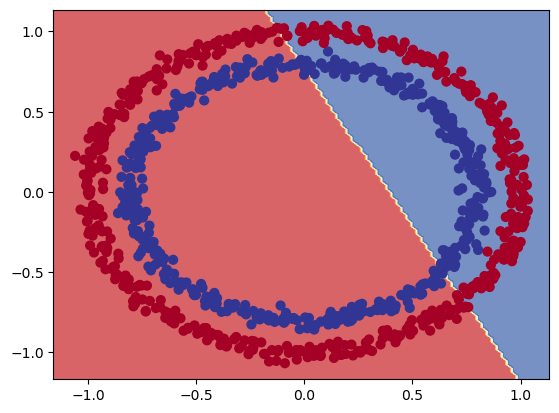

In [18]:
plot_decision_boundary(model_3, X, y)

In [22]:
tf.random.set_seed(42)
X_regression = np.arange(0,1000,5)
y_regression = np.arange(100,1100,5)
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 593.2656 - mae: 593.2656  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 472.0188 - mae: 472.0188 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 352.0239 - mae: 352.0239 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230.9070 - mae: 230.9070 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.6816 - mae: 106.6816 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.7416 - mae: 54.7416 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.7656 - mae: 84.7656 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.2888 - mae: 66.2888
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.7190 - mae: 42.7190 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.4136 - mae: 48.4136 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.6638 - mae: 40.6638 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.8631 - mae: 43.8631 
Epoch 13/100
5/

In [23]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,665 (14.32 KB)

 Trainable params: 1,221 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,444 (9.55 KB)

In [24]:
tf.random.set_seed(42) 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257.2940 - mae: 257.2940  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.8657 - mae: 107.8657
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.1982 - mae: 63.1982
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.9848 - mae: 78.9848
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.8498 - mae: 47.8498
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.8106 - mae: 49.8106
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.8993 - mae: 40.8993
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.2572 - mae: 44.2572
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.5131 - mae: 40.5131
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.4257 - mae: 40.4257
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.1194 - mae: 40.1194
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.9650 - mae: 39.9650
Epoch 13/100
5/5 ━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


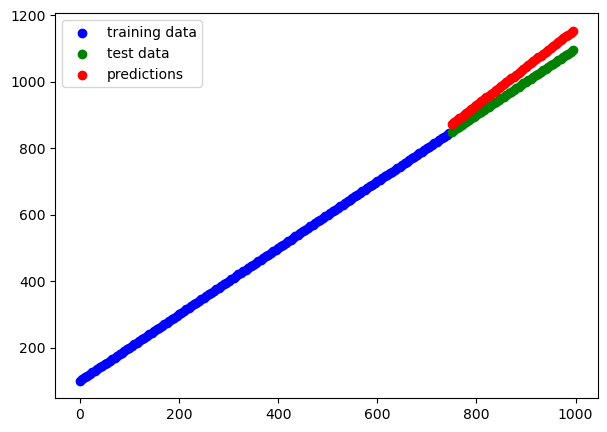

In [25]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(7,5))
plt.scatter(X_reg_train,y_reg_train,c='b',label='training data'),
plt.scatter(X_reg_test,y_reg_test,c='g',label='test data'),
plt.scatter(X_reg_test,y_reg_preds.squeeze(),c='r',label='predictions')
plt.legend()

In [26]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.4403 - loss: 4.8965
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4422 - loss: 4.6479
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4443 - loss: 4.5208
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.4445 - loss: 4.4958
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.4443 - loss: 4.4438
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4443 - loss: 4.4017
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.4455 - loss: 4.3357
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.4460 - loss: 4.2639
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.4494 - loss: 4.0547
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4510 - loss: 4.0468
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4510 - loss: 4.0433
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
doing binary classifcation...


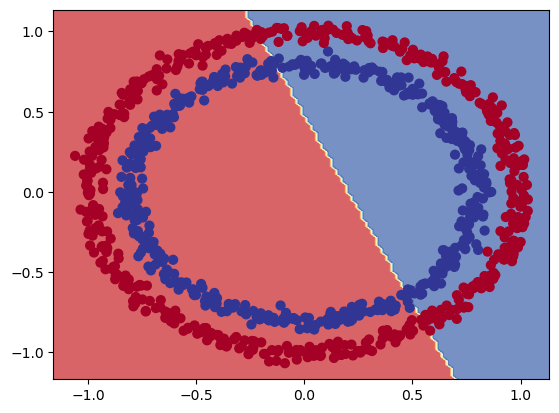

In [27]:
plot_decision_boundary(model_4,X,y)

In [28]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [29]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.4830 - loss: 5.6566 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.4830 - loss: 5.0364
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.4830 - loss: 4.1858
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4830 - loss: 3.4361
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4830 - loss: 1.3889
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4830 - loss: 0.9558
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.4830 - loss: 0.8984
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.4830 - loss: 0.8599
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.4830 - loss: 0.8302
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.4830 - loss: 0.8060
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.4830 - loss: 0.7866
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8717 - loss: 0.3621


[0.3574376404285431, 0.871999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
doing binary classifcation...


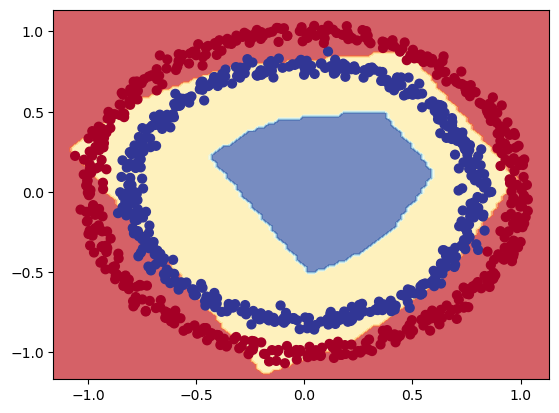

In [31]:
plot_decision_boundary(model_6, X, y)

In [32]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5047 - loss: 0.7018 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.4825 - loss: 0.6997
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.4779 - loss: 0.6984
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4748 - loss: 0.6974
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4700 - loss: 0.6967
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.4707 - loss: 0.6963
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.4701 - loss: 0.6959
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.4689 - loss: 0.6956
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.4561 - loss: 0.6953
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.4499 - loss: 0.6949
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4420 - loss: 0.6946
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.7800 - loss: 0.5237


[0.5232218503952026, 0.7720000147819519]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
doing binary classifcation...


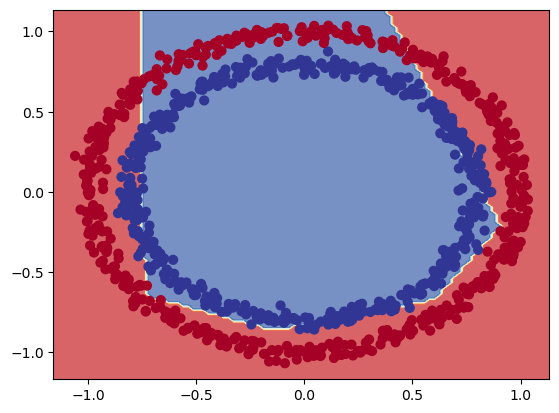

In [34]:
plot_decision_boundary(model_7,X,y)

In [35]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [36]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

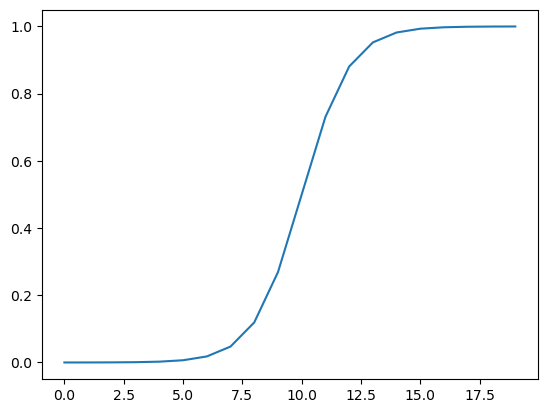

In [37]:
plt.plot(sigmoid(A))

In [38]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

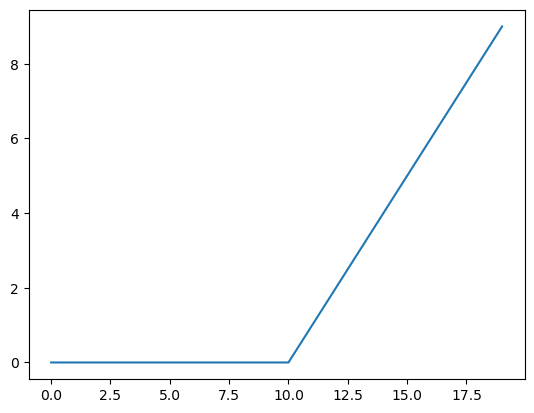

In [39]:
plt.plot(relu(A))

In [40]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [41]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [42]:
len(X)

1000

In [43]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [44]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train,y_train,epochs=25, verbose=False)

In [45]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f'Loss of model is {loss}')
print(f'Accuracy of model is {accuracy*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.1069 
Loss of model is 0.11121895164251328
Accuracy of model is 97.50%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
doing binary classifcation...


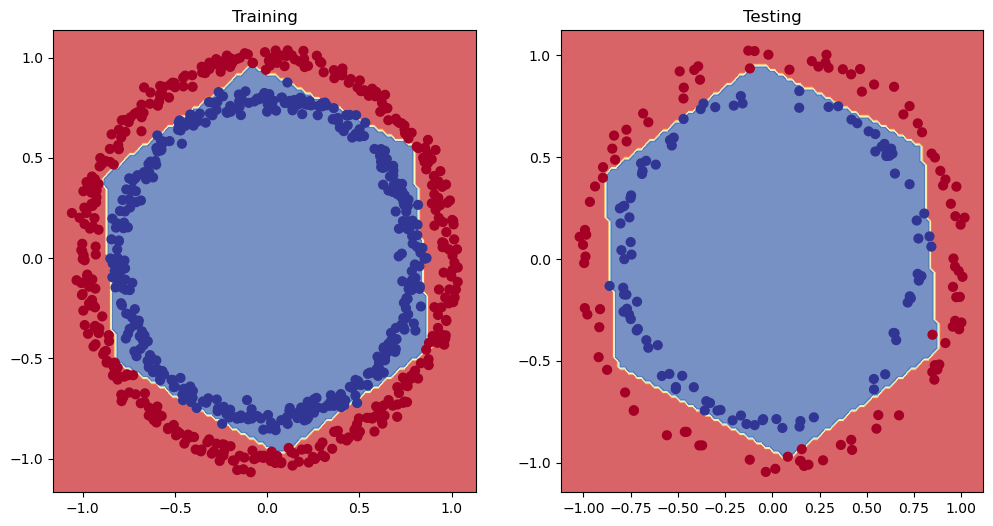

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

Text(0.5, 1.0, 'Model 8 loss and accuracy')

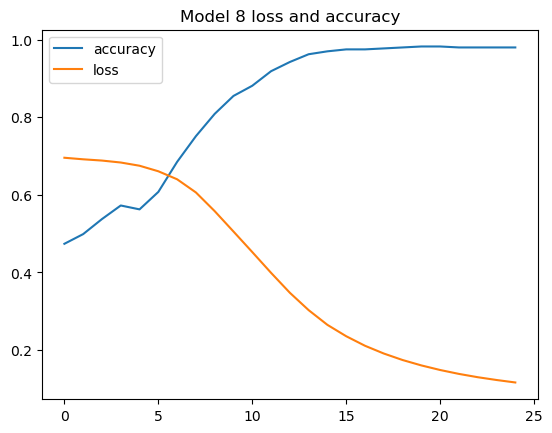

In [47]:
pd.DataFrame(history.history).plot()
plt.title('Model 8 loss and accuracy')

In [48]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.4950 - loss: 0.7192 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.5013 - loss: 0.7179 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5027 - loss: 0.7165 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.5115 - loss: 0.7150 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 0.7134 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.5054 - loss: 0.7117 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.5100 - loss: 0.7100 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.5111 - loss: 0.7081 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.5125 - loss: 0.

<Axes: xlabel='epochs'>

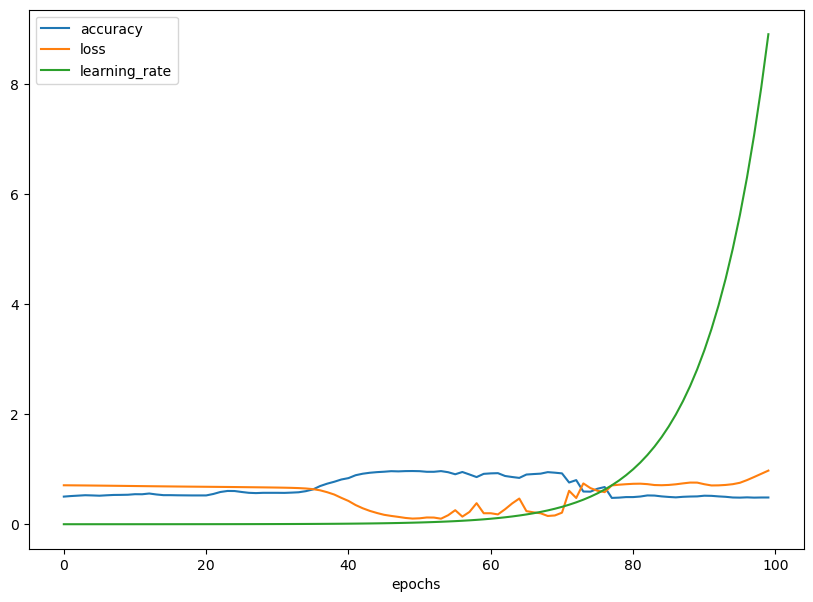

In [49]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

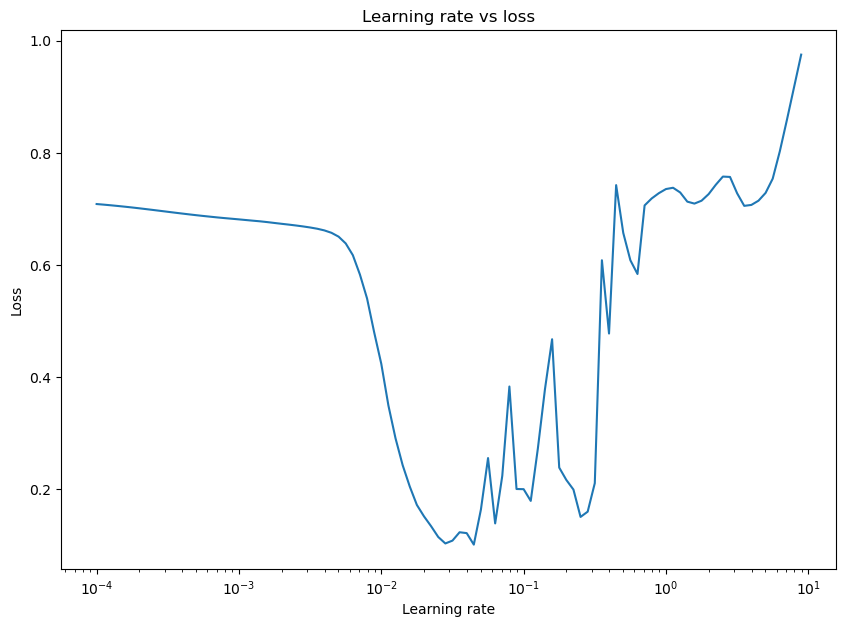

In [50]:
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [51]:
#taking learning rate as 0.02
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

history = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.4715 - loss: 0.7073
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.5059 - loss: 0.6921
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.5002 - loss: 0.6891
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5131 - loss: 0.6832
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.5819 - loss: 0.6652
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.6243 - loss: 0.6350
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.7007 - loss: 0.5886
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7802 - loss: 0.5217
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8388 - loss: 0.4576
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.8511 - loss: 0.4133
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.8706 - loss: 0.3850
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step

In [52]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9047 - loss: 0.2721 


[0.29770949482917786, 0.8899999856948853]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
doing binary classifcation...


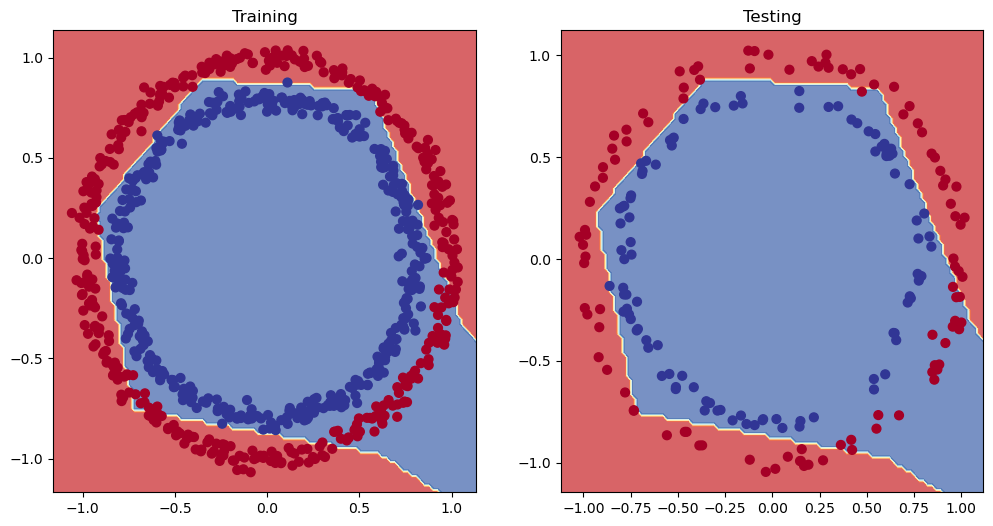

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_10,X_test,y_test)  
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[80, 21],
       [ 1, 98]])

## Multiclass classification

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [56]:
#Show the first training example
print(f'Training example: \n{train_data[0]}\n')
print(f'Testing example: \n{test_data[0]}\n')

Training example: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [57]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [58]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

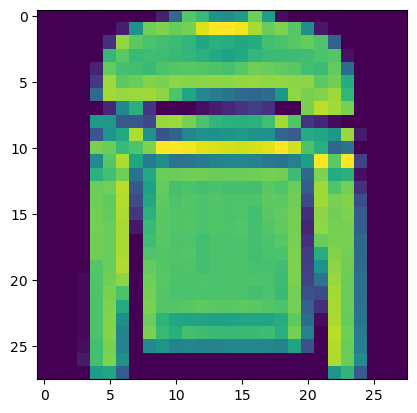

In [59]:
plt.imshow(train_data[5])

In [60]:
train_labels[5]

2

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Pullover')

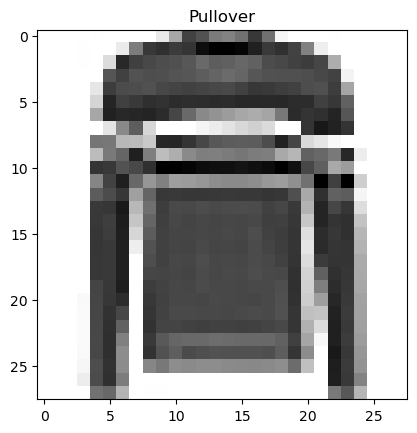

In [62]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]])

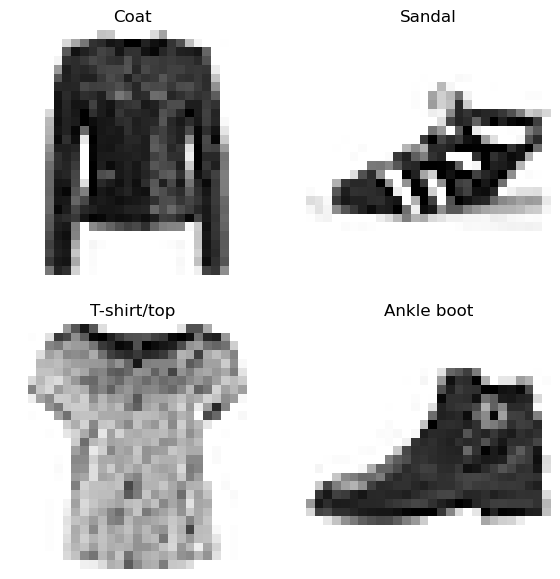

In [63]:
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = np.random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [64]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy']
                 )

non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.0997 - loss: 2.8103 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.0985 - loss: 2.30

In [65]:
model_11.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

# Normalization

In [66]:
train_data.min(), train_data.max()

(0, 255)

In [67]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [68]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy']
                 )

norm_history = model_12.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.3702 - loss: 1.8121 - val_accuracy: 0.5708 - val_loss: 1.2477
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.6110 - loss: 1.1411 - val_accuracy: 0.7371 - val_loss: 0.8054
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.7498 - loss: 0.7569 - val_accuracy: 0.7666 - val_loss: 0.6910
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.7721 - loss: 0.6659 - val_accuracy: 0.7890 - val_loss: 0.6494
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.7863 - loss: 0.6260 - val_accuracy: 0.7934 - val_loss: 0.6267
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.7938 - loss: 0.6056 - val_accuracy: 0.7972 - val_loss: 0.6158
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.7978 - loss: 0.5921 - val_accuracy: 0.7989 - val_loss: 0.6088
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.7999 -

<Axes: title={'center': 'Normalized data'}>

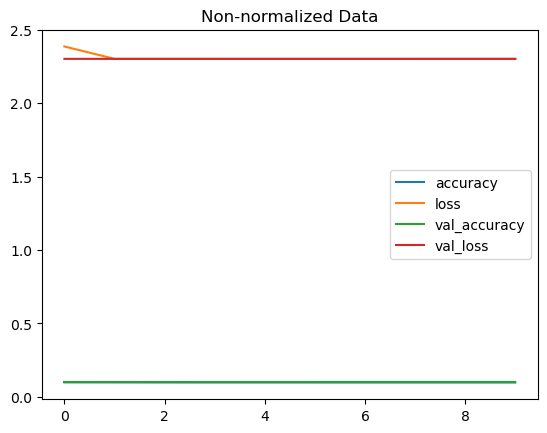

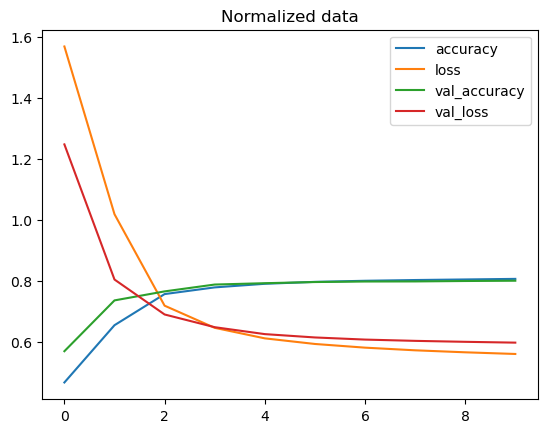

In [69]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [72]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy']
                 )

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 ** (epoch/20))

find_lr_history = model_13.fit(train_data,train_labels,epochs=40,validation_data=(test_data,test_labels), callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.3434 - loss: 1.7183 - val_accuracy: 0.5980 - val_loss: 1.0591 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.6238 - loss: 0.9868 - val_accuracy: 0.6389 - val_loss: 0.8887 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.6934 - loss: 0.7966 - val_accuracy: 0.7256 - val_loss: 0.6943 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.7383 - loss: 0.6662 - val_accuracy: 0.7325 - val_loss: 0.6658 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7455 - loss: 0.6444 - val_accuracy: 0.7363 - val_loss: 0.6568 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.7490 - loss: 0.6337 - val_accuracy: 0.7367 - val_loss: 0.6534 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accura

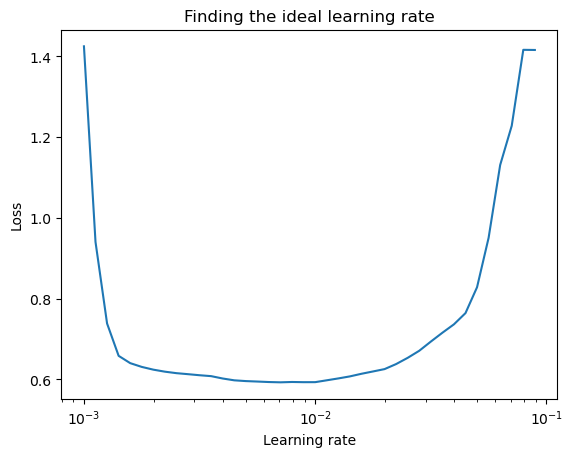

In [73]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [75]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy']
                 )

history = model_14.fit(train_data,train_labels,epochs=20,validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.3520 - loss: 1.6653 - val_accuracy: 0.7671 - val_loss: 0.7547
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7784 - loss: 0.7029 - val_accuracy: 0.7864 - val_loss: 0.6498
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.7955 - loss: 0.6169 - val_accuracy: 0.7946 - val_loss: 0.6184
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8049 - loss: 0.5862 - val_accuracy: 0.8011 - val_loss: 0.6046
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.8094 - loss: 0.5698 - val_accuracy: 0.8042 - val_loss: 0.5980
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.8124 - loss: 0.5591 - val_accuracy: 0.8067 - val_loss: 0.5937
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.8145 - loss: 0.5515 - val_accuracy: 0.8088 - val_loss: 0.5899
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8166 -

In [76]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


array([[1.0759335e-10, 2.6113711e-13, 2.7577062e-12, 5.4605385e-07,
        2.4403009e-08, 1.4800851e-01, 1.5395885e-09, 1.7133997e-01,
        5.5558048e-05, 6.8059534e-01],
       [4.1081294e-04, 9.3423901e-13, 7.8439808e-01, 3.6465195e-07,
        1.6107848e-01, 2.6843363e-19, 5.4104988e-02, 1.3423618e-23,
        7.2898338e-06, 0.0000000e+00],
       [3.5953319e-03, 9.7973233e-01, 9.2661558e-09, 1.6656846e-02,
        4.5196273e-12, 1.8605849e-08, 1.5426094e-05, 6.9077848e-30,
        1.0998602e-09, 3.9119739e-22],
       [5.5922999e-04, 9.9062580e-01, 2.6402450e-10, 8.8135647e-03,
        1.6278001e-13, 1.3340441e-07, 1.2565688e-06, 7.9235812e-30,
        2.3430255e-10, 1.9060786e-19],
       [2.9835039e-01, 6.6218636e-05, 5.2083977e-02, 5.8306344e-02,
        4.8581786e-03, 2.3845188e-09, 5.8540273e-01, 1.4603189e-19,
        9.3219039e-04, 3.0304968e-27]], dtype=float32)

In [77]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [78]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [79]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[723,  13,  11,  88,   6,   1, 146,   0,  11,   1],
       [  1, 949,  12,  32,   2,   0,   4,   0,   0,   0],
       [ 15,   3, 691,  13, 178,   1,  98,   0,   1,   0],
       [ 30,  29,   6, 801,  47,   2,  76,   2,   7,   0],
       [  1,   0, 116,  15, 783,   0,  73,   1,  11,   0],
       [  0,   1,   0,   4,   0, 886,   0,  57,   7,  45],
       [121,   8, 115,  45, 142,   2, 547,   0,  20,   0],
       [  0,   0,   0,   0,   0,  32,   0, 946,   0,  22],
       [  0,   1,   2,  14,  34,  14,  34,   7, 894,   0],
       [  0,   0,   0,   0,   0,  22,   1,  59,   0, 918]])